In [2]:
###################################### Problem 1 a ##########################################


import numpy as np
from scipy import stats
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(42)

# Set the sample size
T = 100

# Step i: Generate Y sequence
e = np.random.standard_normal(T)  # Generate standard normal errors
Y = np.zeros(T)
Y[0] = e[0]  # Set initial value
for t in range(1, T):
    Y[t] = Y[t-1] + e[t]  # Random walk process

# Step ii: Generate X sequence
a = np.random.standard_normal(T)  # Generate new standard normal sequence
X = np.zeros(T)
X[0] = a[0]  # Set initial value
for t in range(1, T):
    X[t] = X[t-1] + a[t]  # Random walk process

# Step iii: Regression analysis
# Add constant term to X
X_with_const = sm.add_constant(X)

# Perform OLS regression
model = sm.OLS(Y, X_with_const)
results = model.fit()

# Extract statistics
beta = results.params[1]  # coefficient on X
t_stat = results.tvalues[1]  # t-statistic for X
r_squared = results.rsquared
p_value = results.pvalues[1]

# Print results
print(f"Beta coefficient: {beta:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"R-squared: {r_squared:.4f}")
print(f"p-value: {p_value:.4f}")

# Test hypothesis at 5% level
alpha = 0.05
reject_null = p_value < alpha

print(f"\nNull hypothesis test (β = 0):")
print(f"Reject null hypothesis: {reject_null}")

Beta coefficient: -0.6545
t-statistic: -3.9135
R-squared: 0.1352
p-value: 0.0002

Null hypothesis test (β = 0):
Reject null hypothesis: True


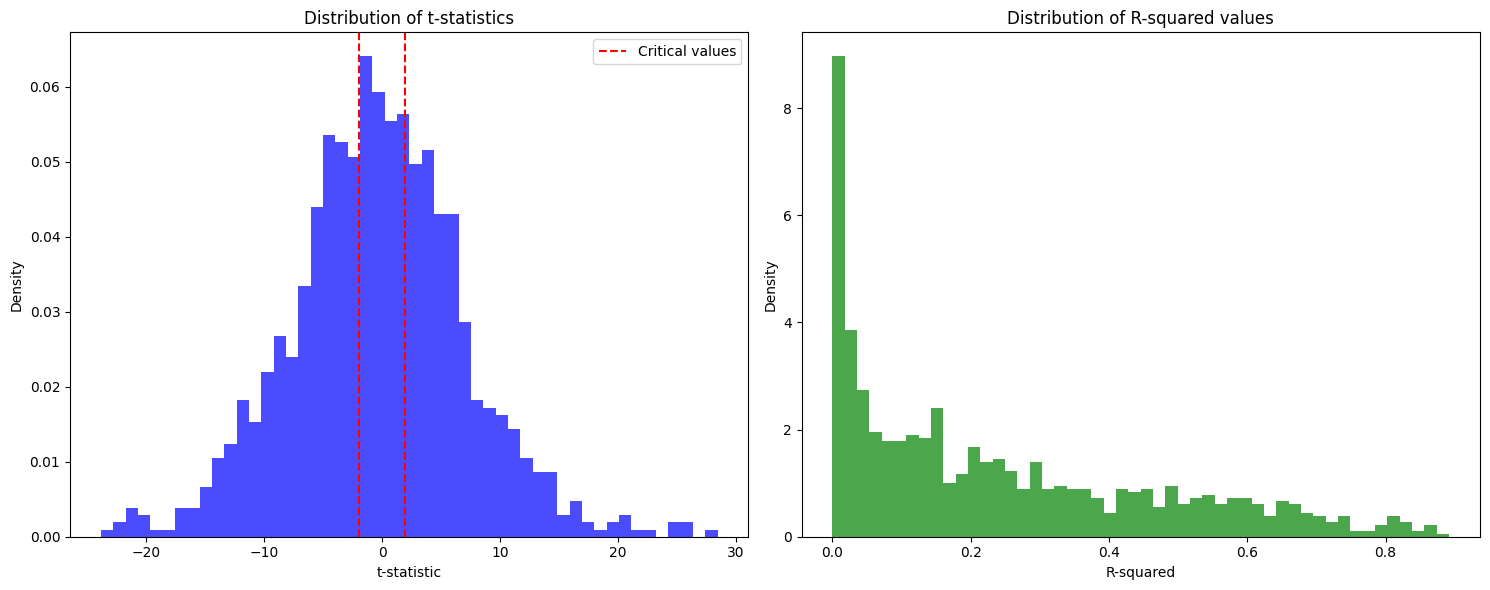

Proportion of significant t-statistics (|t| > 1.96): 0.765

R-squared summary statistics:
Mean: 0.243
Median: 0.170
Standard deviation: 0.228

t-statistics summary statistics:
Mean: -0.309
Median: -0.373
Standard deviation: 7.403


In [3]:
################################# Problem 1 b ##########################################

import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
T = 100  # Time periods
n_simulations = 1000

# Arrays to store results
r_squared_values = np.zeros(n_simulations)
t_statistics = np.zeros(n_simulations)

# Perform simulations
for sim in range(n_simulations):
    # Generate Y sequence
    e = np.random.standard_normal(T)
    Y = np.zeros(T)
    Y[0] = e[0]
    for t in range(1, T):
        Y[t] = Y[t-1] + e[t]
    
    # Generate X sequence
    a = np.random.standard_normal(T)
    X = np.zeros(T)
    X[0] = a[0]
    for t in range(1, T):
        X[t] = X[t-1] + a[t]
    
    # Regression
    X_with_const = sm.add_constant(X)
    model = sm.OLS(Y, X_with_const)
    results = model.fit()
    
    # Store results
    r_squared_values[sim] = results.rsquared
    t_statistics[sim] = results.tvalues[1]

# Calculate proportion of significant t-statistics
significant_t = np.mean(np.abs(t_statistics) > 1.96)

# Create figure with two subplots
plt.figure(figsize=(15, 6))

# Histogram of t-statistics
plt.subplot(1, 2, 1)
plt.hist(t_statistics, bins=50, density=True, alpha=0.7, color='blue')
plt.title('Distribution of t-statistics')
plt.xlabel('t-statistic')
plt.ylabel('Density')
plt.axvline(x=1.96, color='r', linestyle='--', label='Critical values')
plt.axvline(x=-1.96, color='r', linestyle='--')
plt.legend()

# Histogram of R-squared values
plt.subplot(1, 2, 2)
plt.hist(r_squared_values, bins=50, density=True, alpha=0.7, color='green')
plt.title('Distribution of R-squared values')
plt.xlabel('R-squared')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Proportion of significant t-statistics (|t| > 1.96): {significant_t:.3f}")
print(f"\nR-squared summary statistics:")
print(f"Mean: {np.mean(r_squared_values):.3f}")
print(f"Median: {np.median(r_squared_values):.3f}")
print(f"Standard deviation: {np.std(r_squared_values):.3f}")

print(f"\nt-statistics summary statistics:")
print(f"Mean: {np.mean(t_statistics):.3f}")
print(f"Median: {np.median(t_statistics):.3f}")
print(f"Standard deviation: {np.std(t_statistics):.3f}")

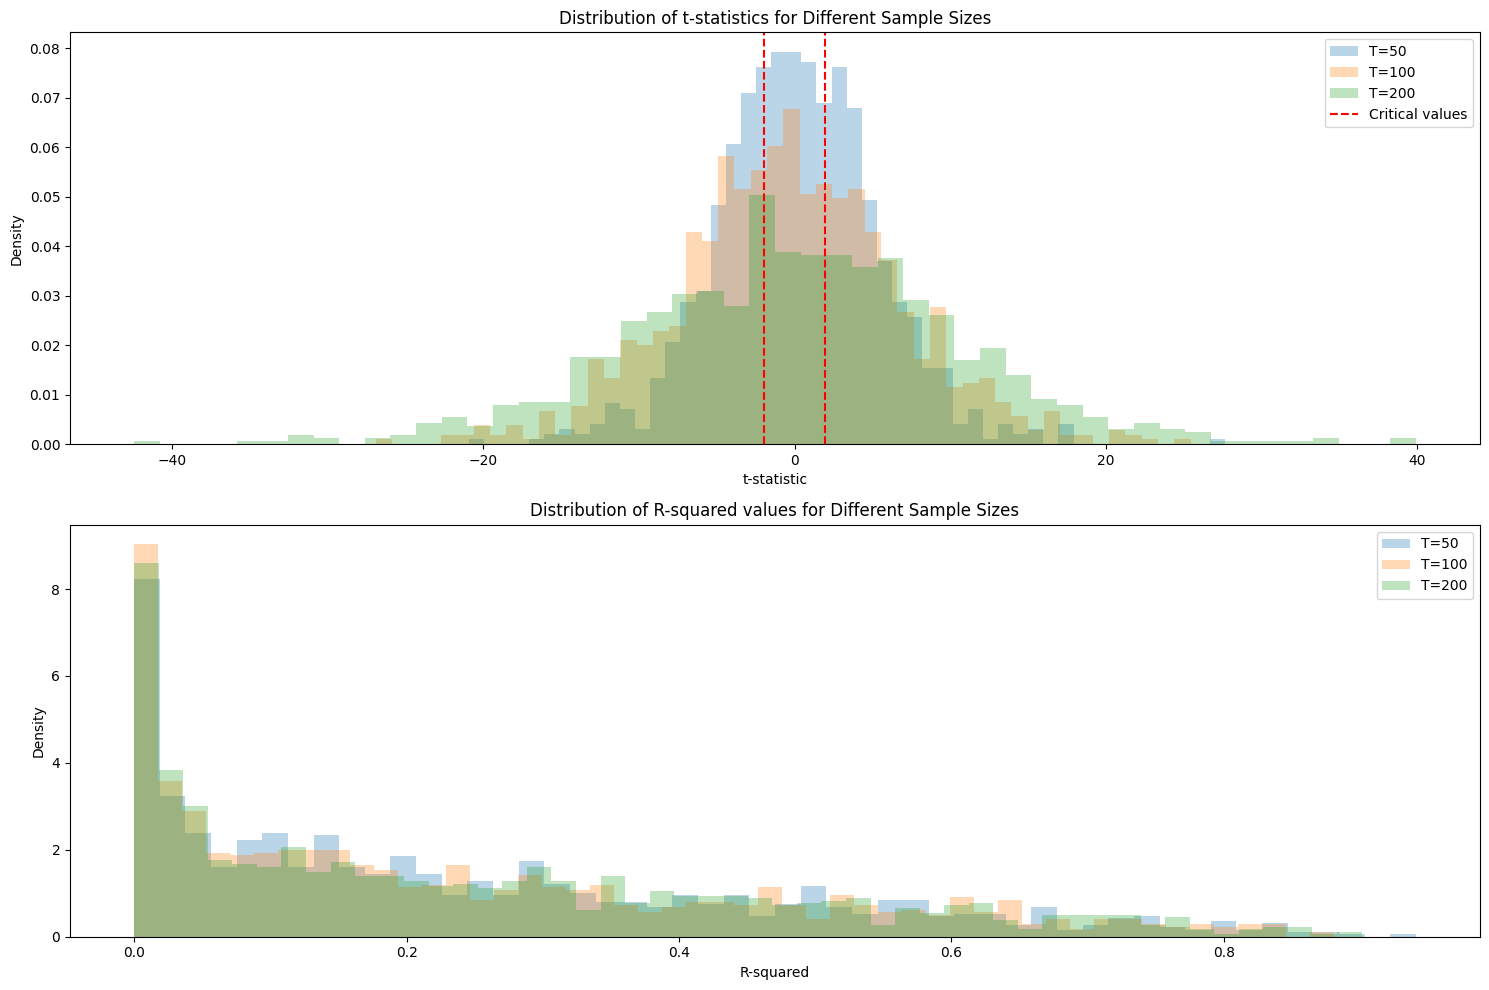


Results for T = 50:
Proportion of significant t-statistics (|t| > 1.96): 0.710
Mean R-squared: 0.246
Mean absolute t-statistic: 4.050
Median absolute t-statistic: 3.242

Results for T = 100:
Proportion of significant t-statistics (|t| > 1.96): 0.767
Mean R-squared: 0.241
Mean absolute t-statistic: 5.632
Median absolute t-statistic: 4.481

Results for T = 200:
Proportion of significant t-statistics (|t| > 1.96): 0.842
Mean R-squared: 0.249
Mean absolute t-statistic: 8.249
Median absolute t-statistic: 6.791


In [4]:
###################################### Problem 1 c ##########################################

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
sample_sizes = [50, 100, 200]
n_simulations = 1000

# Dictionary to store results for each sample size
results = {T: {'r_squared': np.zeros(n_simulations),
               't_stats': np.zeros(n_simulations)} for T in sample_sizes}

# Perform simulations for each sample size
for T in sample_sizes:
    for sim in range(n_simulations):
        # Generate Y sequence
        e = np.random.standard_normal(T)
        Y = np.zeros(T)
        Y[0] = e[0]
        for t in range(1, T):
            Y[t] = Y[t-1] + e[t]
        
        # Generate X sequence
        a = np.random.standard_normal(T)
        X = np.zeros(T)
        X[0] = a[0]
        for t in range(1, T):
            X[t] = X[t-1] + a[t]
        
        # Regression
        X_with_const = sm.add_constant(X)
        model = sm.OLS(Y, X_with_const)
        results[T]['r_squared'][sim] = model.fit().rsquared
        results[T]['t_stats'][sim] = model.fit().tvalues[1]

# Create figure with subplots
plt.figure(figsize=(15, 10))

# Plot t-statistics distributions
plt.subplot(2, 1, 1)
for T in sample_sizes:
    plt.hist(results[T]['t_stats'], bins=50, density=True, alpha=0.3, 
             label=f'T={T}')
plt.axvline(x=1.96, color='r', linestyle='--', label='Critical values')
plt.axvline(x=-1.96, color='r', linestyle='--')
plt.title('Distribution of t-statistics for Different Sample Sizes')
plt.xlabel('t-statistic')
plt.ylabel('Density')
plt.legend()

# Plot R-squared distributions
plt.subplot(2, 1, 2)
for T in sample_sizes:
    plt.hist(results[T]['r_squared'], bins=50, density=True, alpha=0.3,
             label=f'T={T}')
plt.title('Distribution of R-squared values for Different Sample Sizes')
plt.xlabel('R-squared')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics for each sample size
for T in sample_sizes:
    significant_t = np.mean(np.abs(results[T]['t_stats']) > 1.96)
    print(f"\nResults for T = {T}:")
    print(f"Proportion of significant t-statistics (|t| > 1.96): {significant_t:.3f}")
    print(f"Mean R-squared: {np.mean(results[T]['r_squared']):.3f}")
    print(f"Mean absolute t-statistic: {np.mean(np.abs(results[T]['t_stats'])):.3f}")
    print(f"Median absolute t-statistic: {np.median(np.abs(results[T]['t_stats'])):.3f}")